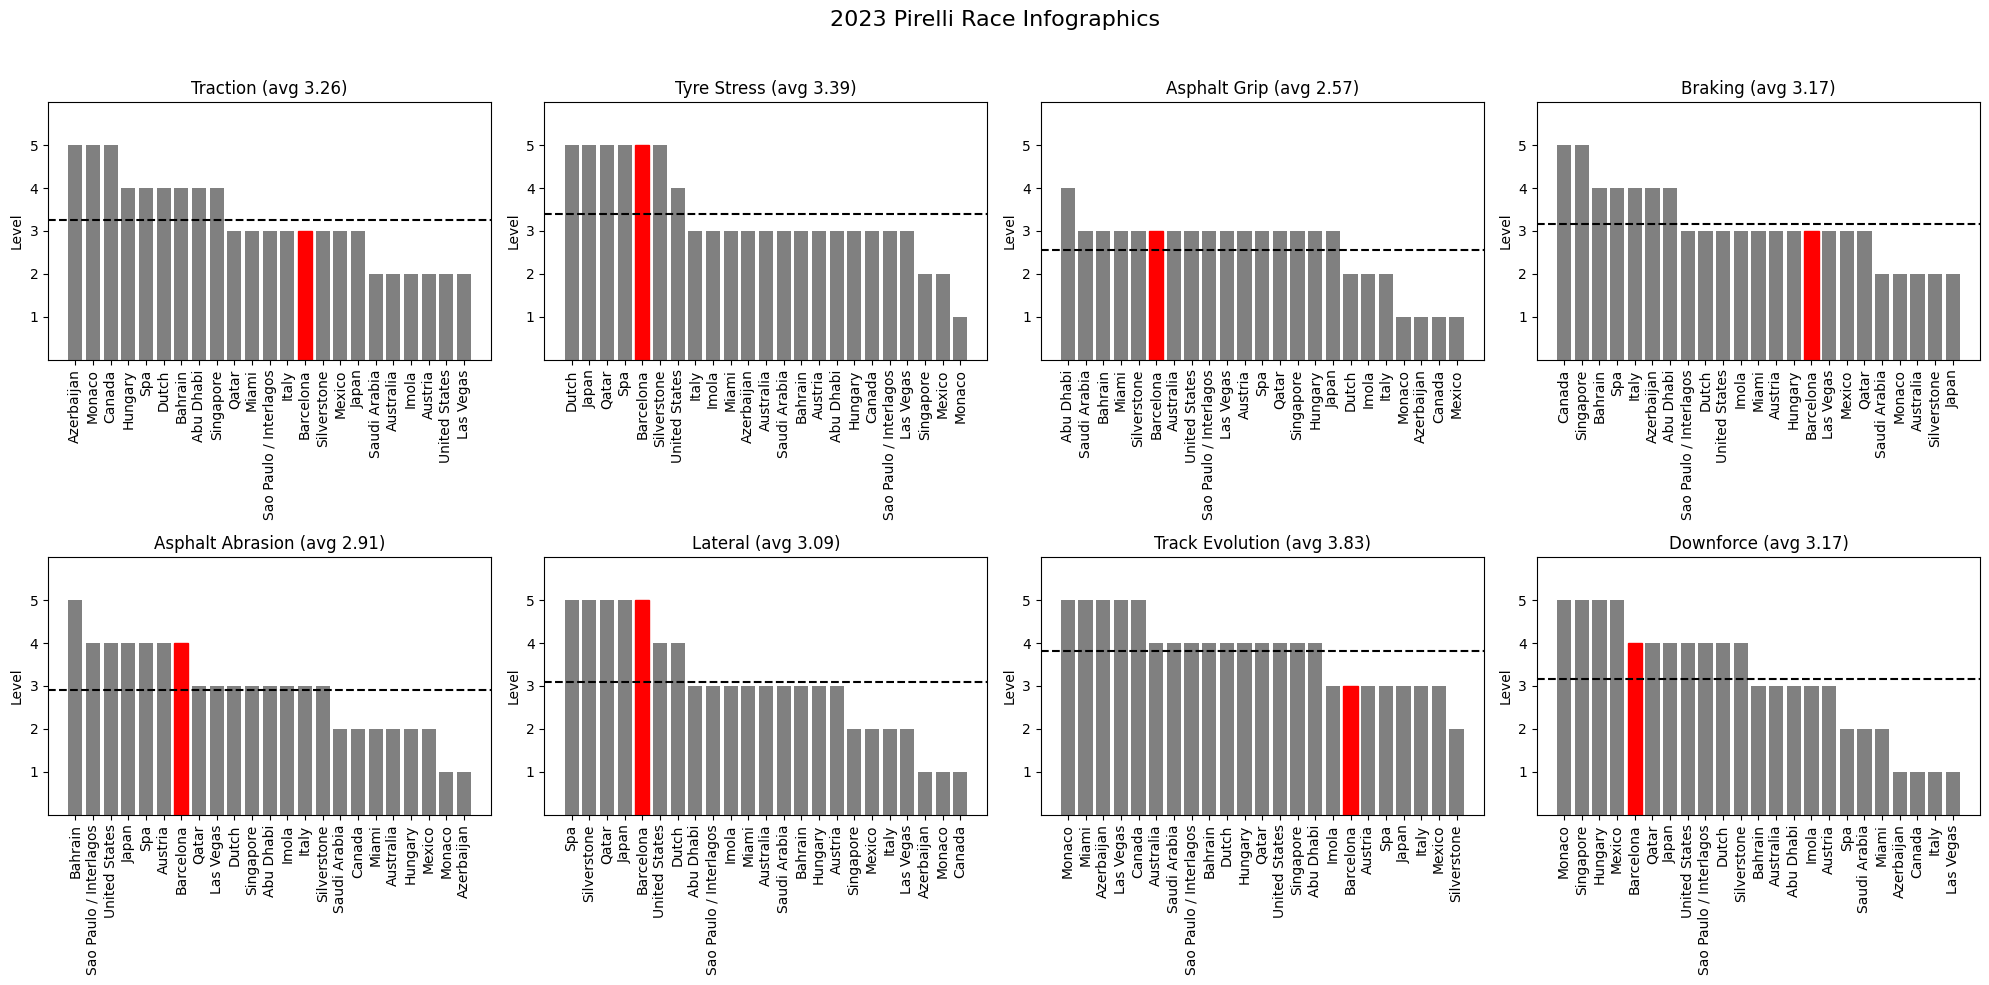

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
file_path = '2023_RaceInfographicsExtract.xlsx'  # Replace with actual file path
df = pd.read_excel(file_path, index_col=0)

# Select the metrics we're interested in
metrics = ["Traction", "Tyre Stress", "Asphalt Grip", "Braking", 
           "Asphalt Abrasion", "Lateral", "Track Evolution", "Downforce"]

# Define the selected track
selected_track = 'Barcelona'

# Set up a 2x4 grid for subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Loop through each metric and create a histogram
for i, metric in enumerate(metrics):
    # Sort values for the metric in descending order
    sorted_metric = df.loc[metric].sort_values(ascending=False)
    
    # Get the average value for the metric
    avg_value = sorted_metric.mean()
    
    # Create bar plot (histogram) for the metric
    bars = axes[i].bar(sorted_metric.index, sorted_metric.values, color='gray')

    # Highlight the selected track's bar in red
    if selected_track in sorted_metric.index:
        selected_index = sorted_metric.index.get_loc(selected_track)
        bars[selected_index].set_color('red')
    
    # Set title with average value in the header
    axes[i].set_title(f"{metric} (avg {avg_value:.2f})")
    axes[i].axhline(avg_value, color = 'black', linestyle = '--')
    
    # Set labels and title for each subplot
    #axes[i].set_xlabel('Circuit')
    axes[i].set_ylabel('Level')
    axes[i].set_ylim(0, 6)  # Set y-axis limits to 0-6

    # Set the y-axis to show discrete integer values
    axes[i].set_yticks(range(1, 6))

    # Rotate x-axis labels for readability
    axes[i].tick_params(axis='x', rotation=90)

# Add overall title to the plot
fig.suptitle('2023 Pirelli Race Infographics', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Leave space for the main title

plt.savefig("2023_PirelliInfographics.svg")
plt.show()
